In [37]:
# 1. How much total salary cost has increased from year 2011 to 2014?
# 2. Who was the top-earning employee across all the years?
# Objective: Perform data manipulation and visualization techniques.

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv('Salaries.csv')
df.head()
df.tail()
df.describe()

/home/mypc/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148648.000000,148043.000000,148648.000000,148648.000000,112490.000000,148648.000000,148648.000000,148648.000000,0.0
mean,74326.110220,66325.398119,5065.821161,3648.761721,25007.777439,74770.035453,93694.776345,2012.522617,NaN
std,42911.633315,42764.898947,11454.266982,8056.655841,15402.235424,50516.440633,62792.743250,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.750000,33587.350000,0.000000,0.000000,11535.192500,36169.370000,44072.062500,2012.000000,NaN
50%,74326.500000,65007.450000,0.000000,811.205000,28628.365000,71427.130000,92406.020000,2013.000000,NaN
75%,111488.250000,94691.050000,4657.597500,4236.035000,35566.790000,105840.920000,132876.997500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [39]:
df.shape

(148648, 13)

In [40]:
# Data Wrangling
df.isna().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [41]:
#missing data found 
#treating missing data

#using fillna()
updated_df = df
updated_df = updated_df[['BasePay', 'Benefits']].fillna(updated_df[['BasePay', 'Benefits']].mean())
updated_df.isna().any()

BasePay     False
Benefits    False
dtype: bool

In [42]:
#add colummns back
# pd.merge(df, updated_df, on = ['BasePay', 'Benefits'])
df[['BasePay', 'Benefits']] = updated_df[['BasePay', 'Benefits']]
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [43]:
# delete notes and status column
df.drop(['Notes', 'Status'], axis = 1, inplace = True)  # Run once!
df.isna().any()

#cleaner data!

Id                  False
EmployeeName        False
JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits            False
TotalPay            False
TotalPayBenefits    False
Year                False
Agency              False
dtype: bool

In [44]:
# filter 2011 canidtates
filter2011 = df['Year'].values == 2011
df2011 = df[filter2011]
df2011.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.777439,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.777439,326373.19,326373.19,2011,San Francisco


In [45]:
# filter 2014 candidates
filter2014 = df['Year'].values == 2014
df2014 = df[filter2014]
df2014.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
110529,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco
110530,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco
110531,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco
110532,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco
110533,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco


In [60]:
#salary increased of one employee from 2011 to 2014
#common employee from year 2011 and year 2014

#merge 2011 and 2014 dfs
pd.merge(df2011, df2014, on = "JobTitle")


,Id_x,EmployeeName_x,JobTitle,BasePay_x,OvertimePay_x,OtherPay_x,Benefits_x,TotalPay_x,TotalPayBenefits_x,Year_x,...,Id_y,EmployeeName_y,BasePay_y,OvertimePay_y,OtherPay_y,Benefits_y,TotalPay_y,TotalPayBenefits_y,Year_y,Agency_y


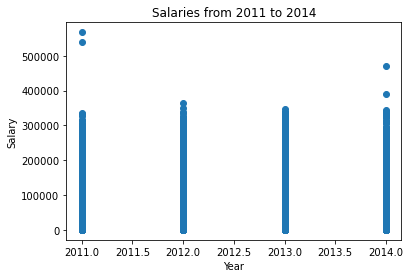

In [64]:
#data visualization
import matplotlib.pyplot as plt

# Scatter plot with day against tip
plt.scatter(df['Year'], df['TotalPay'])
  
# Adding Title to the Plot
plt.title("Salaries from 2011 to 2014")
  
# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('Salary')

plt.show()

In [59]:
#2. Top earning employee
df.max()

Id                         148654
EmployeeName           Zuri Jones
JobTitle              ZOO CURATOR
BasePay                 319275.01
OvertimePay             245131.88
OtherPay                400184.25
Benefits                 96570.66
TotalPay                567595.43
TotalPayBenefits        567595.43
Year                         2014
Agency              San Francisco
dtype: object